<a href="https://colab.research.google.com/github/37khalil/SVM-Implementation/blob/main/Car_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [4]:
import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import itertools

# plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits import mplot3d
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
plotColor=plt.cm.Paired
observationSize=50

Comansant par un cas parfait pour le demantration de la separation lineaire

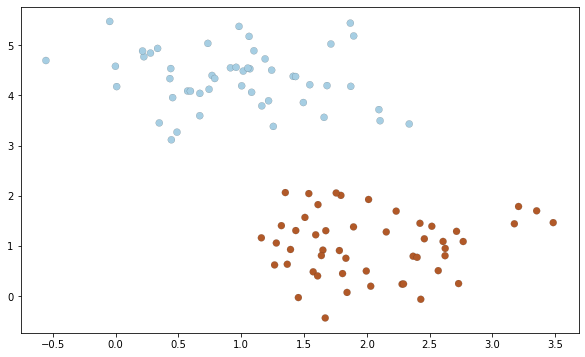

In [5]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=observationSize, cmap=plotColor, linewidth=.1, edgecolors='black')

In [9]:
def plot_svc_decision_function(model, X, y, ax=None, plot_support=True):
    plt.figure(figsize=(10,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=observationSize, cmap=plotColor, linewidth=.1, edgecolors='black')
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1])
    y = np.linspace(ylim[0], ylim[1])
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=observationSize * 3, linewidth=1, c='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def train_linear_SVM(X, y, c=1E6):
    model = SVC(kernel='linear', C=c)
    model.fit(X, y)
    
    return model

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]]


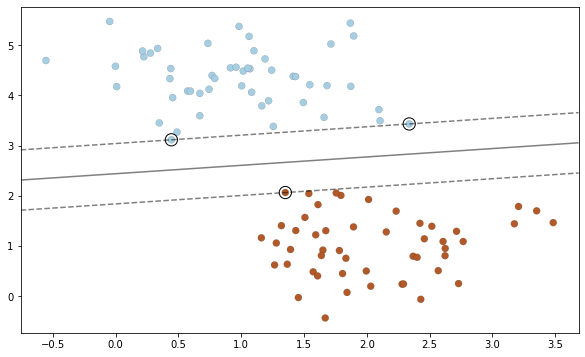

In [10]:
linear_model = train_linear_SVM(X, y)
plot_svc_decision_function(linear_model, X, y)
print(linear_model.support_vectors_)

[[1.35139348 2.2       ]
 [1.35139348 2.06383637]]


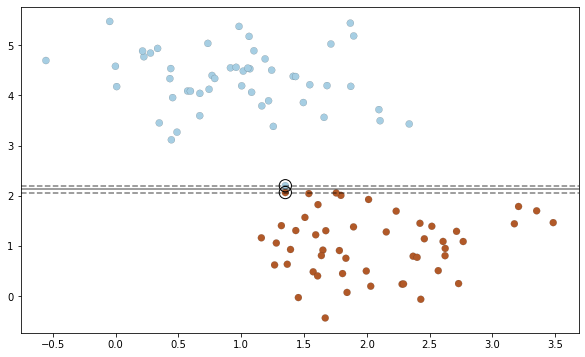

In [11]:
X = np.append(X, [[1.35139348, 2.2]], axis=0)
y = np.append(y, 0)

linear_model = train_linear_SVM(X, y)
plot_svc_decision_function(linear_model, X, y)
print(linear_model.support_vectors_)

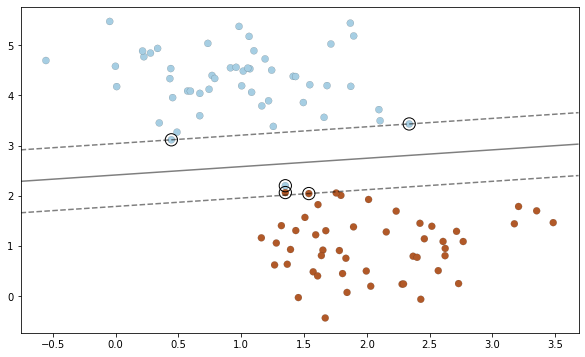

In [12]:
linear_model = train_linear_SVM(X, y, c=5)
plot_svc_decision_function(linear_model, X, y)

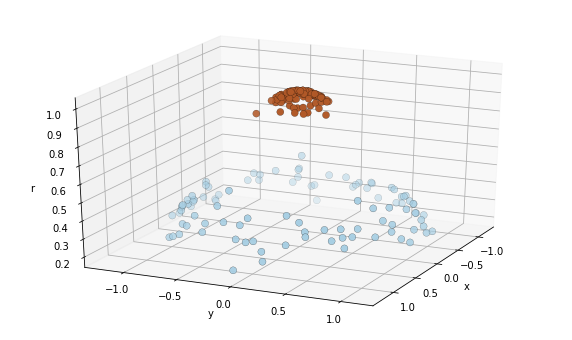

In [13]:
X, y = make_circles(200, factor=.1, noise=.1)

# la fonction du noyaux RBF
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=25, azim=25, X=X, y=y):
    plt.figure(figsize=(10,6))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=observationSize, cmap=plotColor, linewidth=.2,edgecolors='black')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

[LibSVM]

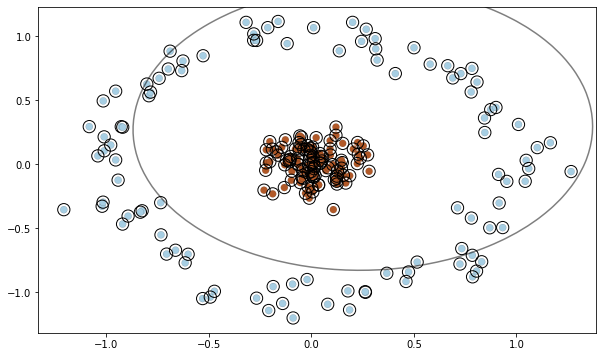

In [14]:
#Under-fitted
clf = SVC(C=1, kernel='rbf', gamma=0.01, verbose=True).fit(X, y)
plot_svc_decision_function(clf, X, y)

[LibSVM]

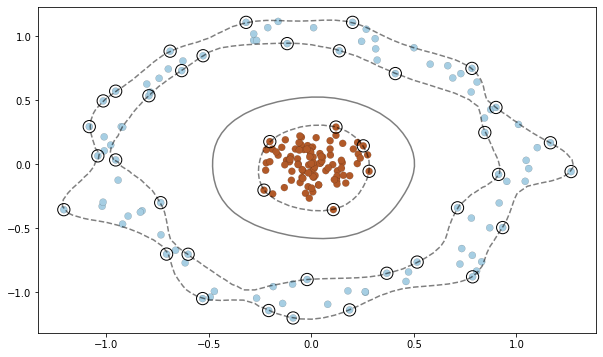

In [15]:
#Over-fitted
clf = SVC(C=1E7, kernel='rbf', gamma=10, verbose=True).fit(X, y)

plot_svc_decision_function(clf, X, y)

[LibSVM]

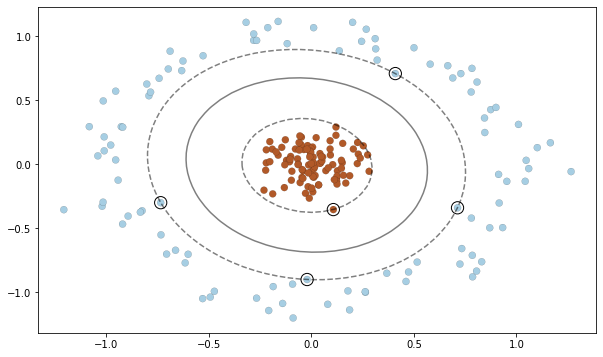

In [16]:
#good model
clf = SVC(kernel='rbf', C=1E6, gamma=0.1, verbose=True)
clf.fit(X, y)

plot_svc_decision_function(clf, X, y)

#Iris Dataset

In [17]:
iris = sns.load_dataset("iris")

iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


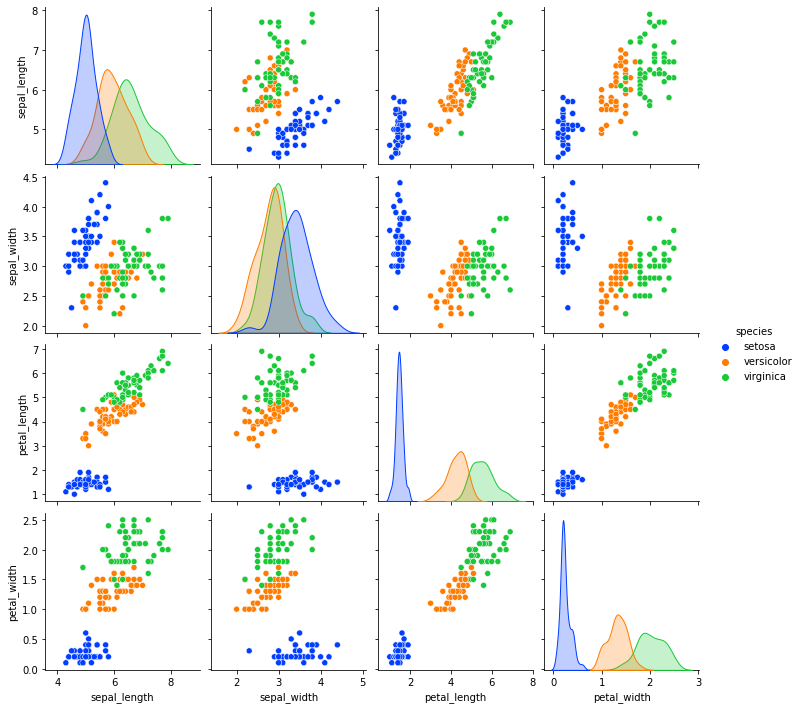

In [ ]:
sns.pairplot(iris, hue="species",palette="bright")

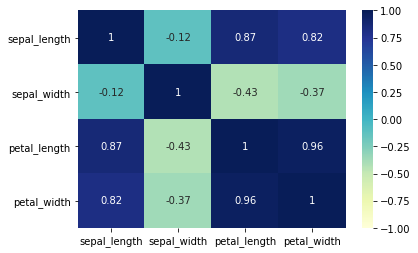

In [18]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)

In [19]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Separating out the features
X = iris.loc[:, features].values

# Separating out the target
y = iris.loc[:,['species']].values

X = StandardScaler().fit_transform(X)

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
pca_model = PCA(n_components=2)

pca_model.fit(X)
principalComponents = pca_model.transform(train_x)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['V1', 'V2'])

encoder = LabelEncoder().fit(y);
principalDf["species"] = train_y.copy()
train_y = encoder.transform(train_y)

test_components = pca_model.transform(test_x)
test_labels = encoder.transform(test_y)

In [22]:
print(pca_model.explained_variance_ratio_)
principalDf

[0.72962445 0.22850762]


,V1,V2,species
0,0.440693,-0.063295,versicolor
1,0.336530,-0.988404,versicolor
2,1.883901,0.419250,virginica
3,-2.364229,-0.341908,setosa
4,1.901784,0.689575,virginica
...,...,...,...
107,-2.184328,-0.469014,setosa
108,1.440151,-0.046988,virginica
109,0.158810,-0.792096,versicolor
110,2.426329,2.556661,virginica


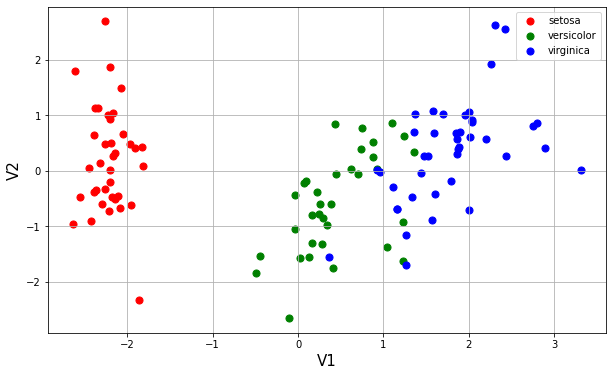

In [23]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('V1', fontsize = 15)
ax.set_ylabel('V2', fontsize = 15)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['species'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'V1']
               , principalDf.loc[indicesToKeep, 'V2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

In [24]:
C = 1E6
gamma = 0.01

linear_svc = SVC(kernel='linear', C=C).fit(principalComponents, train_y)
sigmoid_svc = SVC(kernel='sigmoid', gamma=gamma, C=C).fit(principalComponents, train_y)
poly_svc = SVC(kernel='poly', C=C, gamma=gamma).fit(principalComponents, train_y)
rbf_svc = SVC(kernel='rbf', gamma=gamma, C=C).fit(principalComponents, train_y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

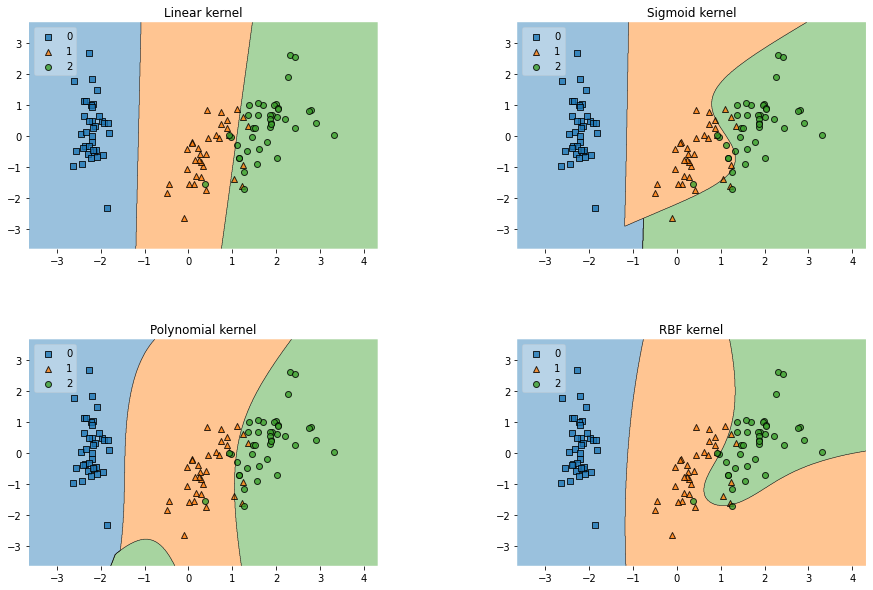

In [25]:
result = {"kernel": [],
          "ACC": []}

# create a mesh to plot in
fig = plt.figure(figsize = (15,10))
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

# title for the plots
titles = ['Linear kernel',
          'Sigmoid kernel',
          'Polynomial kernel',
          'RBF kernel']


for i, clf in enumerate((linear_svc, sigmoid_svc, poly_svc, rbf_svc)):
  acc = clf.score(test_components, test_labels)
  result["kernel"].append(titles[i])
  result["ACC"].append(acc)

  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  fig = plot_decision_regions(X=principalComponents, y=train_y,clf=clf, legend=2)    
  plt.title(titles[i])

plt.show()
accDF = pd.DataFrame(result)

In [83]:
accDF.sort_values("ACC", ascending=False)

,kernel,ACC
3,RBF kernel,0.921053
0,Linear kernel,0.894737
2,Polynomial kernel,0.894737
1,Sigmoid kernel,0.842105


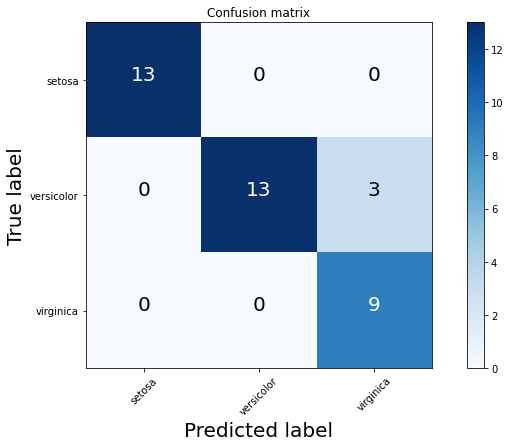

In [26]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

cm = confusion_matrix(test_labels, rbf_svc.predict(test_components))
plot_confusion_matrix(cm,targets)